# Описание проетка: Крупному интернет магазину для увеличения выручку необходимо протестировать спиоск гипотез. 
**В данном проекте будет необходимо: 1) приоритизировать гипотезы, 2) запустить А/В -тест, 3) проанализировать результаты.**


## Приоритизация гипотез.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy import stats as st
import math as mth
from datetime import timedelta
import datetime as dt

In [2]:
# загрузка данных
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [5]:
# Изучим файл с гипотезами и оценками параметров ICE
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [6]:
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


<div class="alert alert-info"> <b>Комментарий студента:</b> Три перспективные гипотезы по ICE :8, 0, 7	</div>


In [7]:
# Посчитаем RICE для гипотез. 
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [8]:
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


<div class="alert alert-info"> <b>Комментарий студента:</b> Три перспективные гипотезы по RICE 7, 2, 0</div>

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

<div class="alert alert-info"> <b>Комментарий студента:</b> Перспективные гипотезы по ICE - это

"Запустить акцию, дающую скидку на товар в день рождения" отмечу - влияние(impact) 9, уверенность(confidence) 9; среднее усилие(efforts) 5, низкое достижение(reach) 1;

"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" тмечу - большое влияние(impact) 10, уверенность(confidence) 8; среднее усилие(efforts) 6, низкое достижение(reach) 3;

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" отмечу - влияние(impact) 7, уверенность(confidence) 8; среднее усилие(efforts) 5, высокое достижение(reach) 10;


Перспективные гипотезы по RICE (влияние, уверенность, усилия, охват) - это

"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" отмечу - влияние(impact) 7, уверенность(confidence) 8; среднее усилие(efforts) 5, высокое достижение(reach) 10;

"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" отмечу - низкое влияние(impact) 3, уверенность(confidence) 7; низкое усилие(efforts) 3, достижение(reach) 8;

"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" отмечу - высокое влияние(impact) 10, уверенность(confidence) 8; среднее усилие(efforts) 6, низкое достижение(reach) 3;</div>

<div class="alert alert-info"> <b>Вывод по ICE и RICE:</b> По ICE наибольшую оценку имели гпиотезы 8,0,7. После применения параметров RICE приоритеты изменились на гипотезы 7,2, 0.  Скорей всего это из-за того , что в случае ICE не учитывали выжную состовялющую оценки гипотезы- охват изменений.В RICE учитывали охват изменений.

## Анализ A/B-теста

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
#проверим данные на дубликаты
orders.duplicated().sum()

0

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [16]:
#проверим данные на дубликаты
visitors.duplicated().sum()

0

In [17]:
orders[orders.duplicated()]

,transactionId,visitorId,date,revenue,group


In [18]:
visitors[visitors.duplicated()]

,date,group,visitors


In [19]:
same = orders.pivot_table(index='visitorId', values='group', aggfunc='nunique')
same.columns = ['visit1']
same.reset_index()
same.query('visit1 > 1').count()

visit1    58
dtype: int64

<div class="alert alert-info"> <b>Комментарий студента V_1:</b> Проверил данные на наличие пересекающихся пользователей(да их оказалось 58) так же проверил дубликаты</div>

In [20]:
#получаем агрегированные кумулятивные показатели из orders
group_ord = (orders.groupby(['date','group'], as_index=False).agg({'transactionId':'nunique','visitorId':'nunique','revenue':'sum'}))

group_ord['group_copy'] = group_ord['group']
group_ord = group_ord.set_index(['date','group'])
csum_ord = group_ord.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index() 

In [21]:
#получаем агрегированные кумулятивные показатели из visitors
csum_visit = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
csum_visit['group_copy'] = csum_visit['group']
csum_visit = csum_visit.set_index(['date','group']).groupby('group_copy').cumsum().reset_index() 

In [22]:
cummulative = csum_ord.join(csum_visit[['visitors']])

In [23]:
cummulative['average_check'] = cummulative['revenue'] / cummulative['transactionId'] # кумулятивные показатели средний чек
cummulative['conversion'] = cummulative['transactionId'] / cummulative['visitors'] # кумулятивные показатели конверсия

In [24]:
cummulative.head()

,date,group,transactionId,visitorId,revenue,visitors,average_check,conversion
0,2019-08-01,A,24,20,148579,719,6190.791667,0.033380
1,2019-08-01,B,21,20,101217,713,4819.857143,0.029453
2,2019-08-02,A,44,39,242401,1338,5509.113636,0.032885
3,2019-08-02,B,45,43,266748,1294,5927.733333,0.034776
4,2019-08-03,A,68,63,354874,1845,5218.735294,0.036856


### Постройте график кумулятивной выручки по группам. 

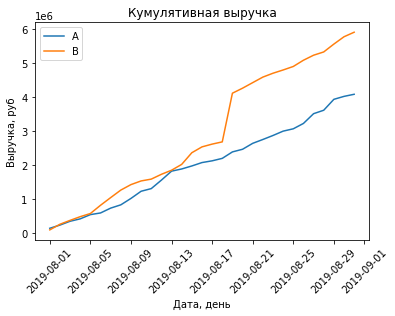

In [25]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']] # датафрейм с кумулятивной выручкой по дням в группе А
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']] # датафрейм с кумулятивной выручкой по дням в группе B
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' ) # Строим график выручки группы А
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B') # Строим график выручки группы В
plt.xticks(rotation=45)
plt.legend() 
plt.title('Кумулятивная выручка')
plt.xlabel('Дата, день')
plt.ylabel('Выручка, руб')
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b>По графику выручка увеличивается в течении графика. Сегмент В лидирует на протяжении всего графика и далее скачок в середине августа(возможно увелечение заказов).</div>

### Постройте график кумулятивного среднего чека по группам. 

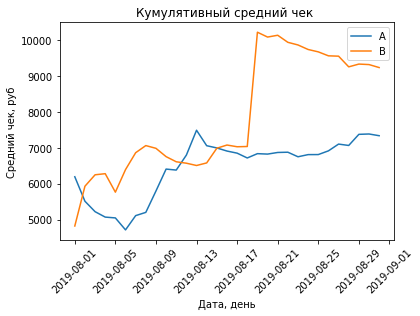

In [26]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']] # тоже , что и предудущим графике только кумулятивным средним чеком по дням руппы А
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']] # тоже , что и предудущим графике только кумулятивным средним чеком по дням руппы В
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' ) # Строим график А
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B') # Строим график В
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек ')
plt.xlabel('Дата, день')
plt.ylabel('Средний чек, руб')
plt.legend() 
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b>Кумулятивное значение среднего чека нестабильно. В середине августа произошел скачок у сегмента В(возможно аномалии). Пик для семента А был не много ранее, после стабилизировался.</div>

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. 

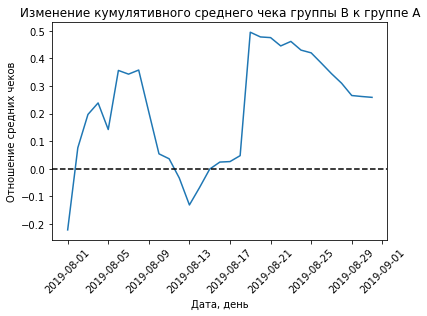

In [27]:
vrem = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']],left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])) # изменение кумулятивного среднего чека В к А
plt.plot(vrem['date'], vrem['average_check_B'] / vrem['average_check_A']-1) # строим график
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.title('Изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата, день')
plt.ylabel('Отношение средних чеков')
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b>Надо проверить наличие анамалий,в связи с резким изменением </div>

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. 

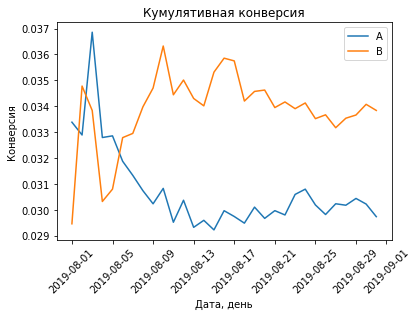

In [28]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']] # датафрейм с кумулятивной конверсией по дням в группе А
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']] # датафрейм с кумулятивной конверсией по дням в группе В
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' ) # строим график группы А
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B') # строим график группы В
plt.legend()
plt.xticks(rotation=45)
plt.title("Кумулятивная конверсия")
plt.xlabel('Дата, день')
plt.ylabel('Конверсия')
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> ГРуппа В демонстрирует большую конверсию по сравнению с группой А </div>

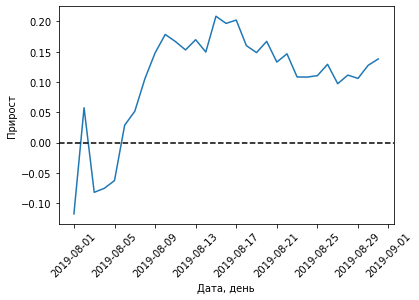

In [29]:
vrem = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']],left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])) # изменение кумулятивного конверсии В к А
plt.plot(vrem['date'], vrem['conversion_B'] / vrem['conversion_A']-1)
plt.axhline(y=0, color='black', linestyle='--')  
plt.xlabel('Дата, день')
plt.ylabel('Прирост')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> Конверсия В лучше А </div>

<div class="alert alert-info"> <b>Вывод:</b> Рассмотрели кумулятивные метрики. По графикам , можно отметить, что: 1) В начале группа А лидировала по сравнению с группой В, но далее упустила инициативу группе В, 2) группа В выигрывает у группы А за счет большого прироста в середине августа, 3) Пока имеется не определенность выводы не получится сделать, есть вариант проверить аномалии.  </div>

### Постройте точечный график количества заказов по пользователям.

In [30]:
# создадим переменную пользовательстких заказов
user_ord = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})

In [31]:
user_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1030
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   visitorId      1031 non-null   int64
 1   transactionId  1031 non-null   int64
dtypes: int64(2)
memory usage: 24.2 KB


In [32]:
user_ord.head()

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


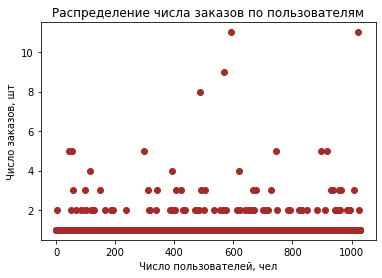

In [33]:
# Оценим распределние числа заказов по пользователям
x_values = pd.Series(range(0, len(user_ord)))
plt.scatter(x_values, user_ord['transactionId'], color='brown') 
plt.title('Распределение числа заказов по пользователям')
plt.xlabel('Число пользователей, чел')
plt.ylabel('Число заказов, шт')
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> По графику видно что больше двух заказов совершают гораздо меньше человек. Можно предположить аномальные заказы больше двух раз.</div>

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [34]:
# Посчитаем перцентили заказов
print('90 перцентиль: %.2f' % (np.percentile(user_ord['transactionId'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(user_ord['transactionId'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(user_ord['transactionId'], [99]))) 

90 перцентиль: 1.00
95 перцентиль: 2.00
99 перцентиль: 4.00


<div class="alert alert-info"> <b>Комментарий студента:</b> 5% совершают более двух заказов и 1 % более четырех</div>

### Постройте точечный график стоимостей заказов.

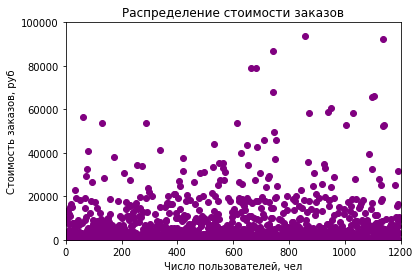

In [35]:
# Оценим распределние стоимости заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='purple') 
plt.title('Распределение стоимости заказов')
plt.xlabel('Число пользователей, чел')
plt.ylabel('Стоимость заказов, руб')
plt.axis([0, 1200, 0, 100000])

plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> В осноном покупки в пределах от 20 до 40 тыс. </div>

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [36]:
# # Посчитаем перцентили стоимости
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90]))) 
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 18168.00
95 перцентиль: 28000.00
99 перцентиль: 58233.20


<div class="alert alert-info"> <b>Комментарий студента:</b> Перцентили показали что у 5% чек дороже 28 тыс. и у 1% чек дороже 58 тыс. 233 </div>

<div class="alert alert-info"> <b>Вывод:</b> Изучили аномалии по заказам и стоимости: 1) Согласно графику по количеству заказов и перцинтили количества заказов больше двух заказов совершают гораздо меньше человек, а именно 5% совершают более двух заказов и 1 % более четырех; 2) Согласно графику по стоимости заказов и перцинтили стоимости заказов покупки совершаются в пределах 20-40 тыс., 5% заказов чек дороже 28000. И у 1% заказов чек дороже 58 тыс. 233 р. .</div>

 ### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. 

In [37]:
# произведем стистическую значимость различий в конверсии между группами 
OU_A = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
OU_A.columns = ['visitorId', 'orders']
OU_B = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
OU_B.columns = ['visitorId', 'orders']
print('Покупатели в A: {}'.format(len(OU_A)))
print('Покупки в А: {}'.format(OU_A['orders'].sum()))
print('Посетители в A: {}\n'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Покупатели в B: {}'.format(len(OU_B)))
print('Покупки в B: {}'.format(OU_B['orders'].sum()))
print('Посетители в B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))

 
zakazy_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(OU_A))):
    zakazy_1.append(0)
zak_non_user_A = pd.Series(data = zakazy_1, name = 'orders')

zakazy_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(OU_B))):
    zakazy_2.append(0)
zak_non_user_B = pd.Series(data = zakazy_2, name = 'orders')

# по тесту на структурном подходе Уилкоксона-Манна-Уитни
A = pd.concat([OU_A['orders'], zak_non_user_A], axis=0)
B = pd.concat([OU_B['orders'], zak_non_user_B], axis=0)
print('\nОтносительный прирост конверсии B к A: {:.3f}'.format(B.mean()/A.mean()-1))
alpha = 0.05 # критический уровень статистической значимости
results = stats.mannwhitneyu(A, B)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Покупатели в A: 503
Покупки в А: 557
Посетители в A: 18736

Покупатели в B: 586
Покупки в B: 640
Посетители в B: 18916

Относительный прирост конверсии B к A: 0.138
P-value: 0.016792355056752608
Отвергаем нулевую гипотезу


<div class="alert alert-info"> <b>Комментарий студента V_1:</b> H1, имеется статистическая разница. Здесь мы отвергаем нулевую гипотезу  </div

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [38]:
# так же по тесту на структурном подходе Уилкоксона-Манна-Уитни
print('Изменение среднего чека в B к A: {:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем, разница статистически значима')
else:
    print('Не получилось отвергнуть, вывод о различии сделать нельзя')

Изменение среднего чека в B к A: 0.259
P-value: 0.7292909855432458
Не получилось отвергнуть, вывод о различии сделать нельзя


<div class="alert alert-info"> <b>Комментарий студента V_1:</b> в связи с тем, что вывод о различии сдлеать нельзя мы не отвергаем H0  </div>

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. 

In [39]:
zakazy_lim = 2 # предельное колическтво заказов согласно перцентиль 
dengi_lim = 28000 # предельная сумма покупки согласно перцентиль

In [40]:
# Считаем аномальные показатели
bolsh_zak = pd.concat([OU_A[OU_A['orders']>zakazy_lim]['visitorId'], OU_B[OU_B['orders']>zakazy_lim]['visitorId']], axis = 0)
dor_zak = orders[orders['revenue']>dengi_lim]['visitorId']
anom_zak = pd.concat([bolsh_zak, dor_zak], axis = 0).drop_duplicates().sort_values()
print('Аномальные пользователи: {}'.format(len(anom_zak)))

Аномальные пользователи: 74


In [41]:
# так же по тесту на структурном подходе Уилкоксона-Манна-Уитни
filt_zak_A = pd.concat([OU_A[np.logical_not(OU_A['visitorId'].isin(anom_zak))]['orders'],zak_non_user_A], axis = 0)
filt_zak_B = pd.concat([OU_B[np.logical_not(OU_B['visitorId'].isin(anom_zak))]['orders'],zak_non_user_B], axis = 0)
print('\nПрирост конверсии B к A после очистки данных: {:.3f}'.format(filt_zak_B.mean()/filt_zak_A.mean()-1))
results = stats.mannwhitneyu(filt_zak_A, filt_zak_B)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


Прирост конверсии B к A после очистки данных: 0.173
P-value: 0.013042592743036745
Отвергаем нулевую гипотезу


<div class="alert alert-info"> <b>Комментарий студента V_1:</b> H1, имеется статистическая разница. Здесь мы отвергаем нулевую гипотезу  </div>

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [42]:
# так же по тесту на структурном подходе Уилкоксона-Манна-Уитни
print(' Изменение среднего чека в B к A после очистки данных: {:.3f}'.format(orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(anom_zak)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(anom_zak)))]['revenue'].mean()-1))              
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(anom_zak)))]['revenue'],orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(anom_zak)))]['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем, разница статистически значима')
else:
    print('Не получилось отвергнуть, вывод о различии сделать нельзя')

 Изменение среднего чека в B к A после очистки данных: -0.020
P-value: 0.738481751314565
Не получилось отвергнуть, вывод о различии сделать нельзя


<div class="alert alert-info"> <b>Комментарий студента V_1:</b> вывода о разлии нет, мы не отвергаем H0  </div>

### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

<div class="alert alert-info"> <b>Вывод:</b>  ПО вышеполученным результатам можно сказать что граппа В победила. Различий в средних чеках между группами нет, но по статистики группа В превосходит группу А. Касаемо выручки, можно отметить , что конверсия может влиять на выручку , в этом случае в группе В увеличилась выручка в связи с увелечением конверсии.
Вариант решения 1 . Остановить тест.</div>

<div class="alert alert-info"> <b>Общий вывод</b> В общем выводе можно сказать что были проведены: 1) исследования по гипотизам ICE и RICE, где мы увидели изменения приоритетов в связи с учетом охвата изменений. 2) Анализ А/В теста , где были рассмотрены комулятивные метрики, но после анализа оставалась не определенность в связи с вариантом аномалий, 3) Аномалии были изучены и пришли к выводу , что в основном делали не более 2 заказов и не выше 28 тыс. 4) в статических значимосях различий была выевлена группа победитель и было предложено остановить тест. 